# Data Manipulation with pandas

👋 Exercícios do Curso realizado na plataforma DataCamp

## 1. Get Started
Below is a code cell. It is used to execute Python code. The code below imports three packages you used in Data Manipulation with pandas: pandas, NumPy, and Matplotlib. The code also imports data you used in the course as DataFrames using the pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

🏃**To execute the code, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [ ]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
pasta= "/content/drive/MyDrive/Colab Notebooks/visualizacao_matplotlib/"
avocado = pd.read_csv(pasta+"avocado.csv")
homelessness = pd.read_csv(pasta+"homelessness.csv")
temperatures = pd.read_csv(pasta+"temperatures.csv")
walmart = pd.read_csv(pasta+"walmart.csv")

# Print the first DataFrame
homelessness.head(5)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


## 2. Write Code
After running the cell above, you have created four pandas DataFrames: `avocado`, `homelessness`, `temperatures`, and `walmart`. 

**Add code** to the code cells below to try one (or more) of the following challenges:

1. Print the highest weekly sales for each `department` in the `walmart` DataFrame. Limit your results to the top five departments, in descending order. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=1).
2. What was the total `nb_sold` of organic avocados in 2017 in the `avocado` DataFrame? If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=6).
3. Create a bar plot of the total number of homeless people by region in the `homelessness` DataFrame. Order the bars in descending order. Bonus: create a horizontal bar chart. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).
4. Create a line plot with two lines representing the temperatures in Toronto and Rome. Make sure to properly label your plot. Bonus: add a legend for the two lines. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

Be sure to check out the **Answer Key** at the end to see one way to solve each problem. Did you try something similar?

**Reminder: To execute the code you add to a cell, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [ ]:
# 1. Print the highest weekly sales for each department
department_sales = walmart.groupby(by='department')[['weekly_sales']].max()
best_departments = department_sales.sort_values(by='weekly_sales',ascending=False)
best_departments.head(5)


,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. What was the total `nb_sold` of organic avocados in 2017?
avocado[(avocado['date']>='2017')&(avocado['date']<'2018')][avocado['type']=='organic']['nb_sold'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


23321281.07

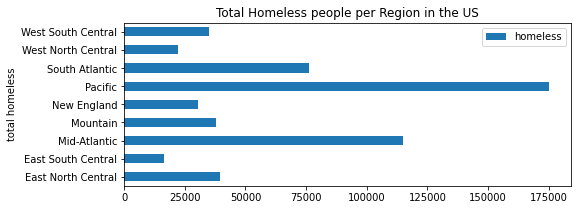

In [ ]:
# 3. Create a bar plot of the number of homeless people by region
homelessness_tot = homelessness.groupby('region').sum().loc[:,['individuals','family_members']].agg('sum',axis='columns')

homelessness_tot.plot(kind='barh',rot=0,figsize=(8,3),label='homeless')
#plt.xlabel("region")
plt.ylabel("total homeless")
plt.title("Total Homeless people per Region in the US")
plt.legend()
plt.show()

In [ ]:
temperatures.head(5)

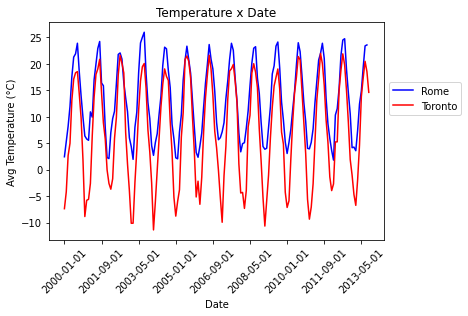

In [22]:
# 4. Create a line plot of temperatures in Toronto and Rome
temp_rome = temperatures[temperatures['city'] == 'Rome']
temp_tor = temperatures[temperatures['city'] == 'Toronto']
ax = temp_rome.plot(x='date',y='avg_temp_c',label='Rome',color='blue')
temp_tor.plot(ax=ax,x='date',y='avg_temp_c',label='Toronto', rot=45, color ='red')
plt.ylabel("Avg Temperature (°C)")
plt.xlabel("Date")
plt.title('Temperature x Date')
plt.legend(bbox_to_anchor=(1.0, 0.75))
plt.show()